Laad de benodigde packages in

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from TN_code import TISTNplot as TN

Laad de data in

In [2]:
# Importing the dataset
dataset = pd.read_excel('Proef7 metingen.xlsx')
print(dataset)

    Druk lek (mbar)     t1      t2      t3      t4      t5  t6      t_a  \
0                30   6.33   5.199   5.232   5.099   5.232 NaN   5.4184   
1                25   7.71   6.030   5.970   5.900     NaN NaN   6.4025   
2                20  10.50   8.170   8.250   7.770   7.840 NaN   8.5060   
3                15  11.91   9.700   9.510   9.480     NaN NaN  10.1500   
4                10  18.71  16.550  16.350  16.470  16.070 NaN  16.8300   
5                 5  29.63  25.860  25.350  25.420  26.180 NaN  26.4880   
6               NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
7               NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
8   * met gasbalast    NaN     NaN     NaN     NaN     NaN NaN      NaN   
9               NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
10              NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
11              NaN    NaN     NaN     NaN     NaN     NaN NaN      NaN   
12              NaN    Na

In [4]:
dataset = dataset.to_dict()

# Constant volume methode

In [5]:
t1 = np.array(list(dataset['t_actual1'].values()))[~np.isnan(np.array(list(dataset['t_actual1'].values())))]
t2 = np.array(list(dataset['t_actual2'].values()))[~np.isnan(np.array(list(dataset['t_actual2'].values())))]
t3 = np.array(list(dataset['t_actual3'].values()))[~np.isnan(np.array(list(dataset['t_actual3'].values())))]
t4 = np.array(list(dataset['t_actual4'].values()))[~np.isnan(np.array(list(dataset['t_actual4'].values())))]
p1 = 100*np.array(list(dataset['druk1'].values()))[~np.isnan(np.array(list(dataset['druk1'].values())))]
p2 = 100*np.array(list(dataset['druk2'].values()))[~np.isnan(np.array(list(dataset['druk2'].values())))]
p3 = 100*np.array(list(dataset['druk3'].values()))[~np.isnan(np.array(list(dataset['druk3'].values())))]
p4 = 100*np.array(list(dataset['druk4'].values()))[~np.isnan(np.array(list(dataset['druk4'].values())))]

Noteer bepaalde constanten zoals de onnauwkuerigheid van de druk en de tijd, einddruk en het volume van de kamer.

In [6]:
dt = 0.02
dp = 0.05*100 #HPa->Pa
pe1 = 3e-3*100 #HPa->Pa
pe2 = 100*100 #HPa->Pa

d_kamer = 0.280
dd_kamer = 0.002
L_kamer = 0.700
dL_kamer = 0.005

V_kamer = np.pi*(d_kamer/2)**2*L_kamer
dV_kamer = np.sqrt((np.pi/4*d_kamer**2*dL_kamer)**2+(np.pi/2*L_kamer*d_kamer*dd_kamer)**2)

Maak een plotje van de data om te laten zien dat het een exponentiëel verval is

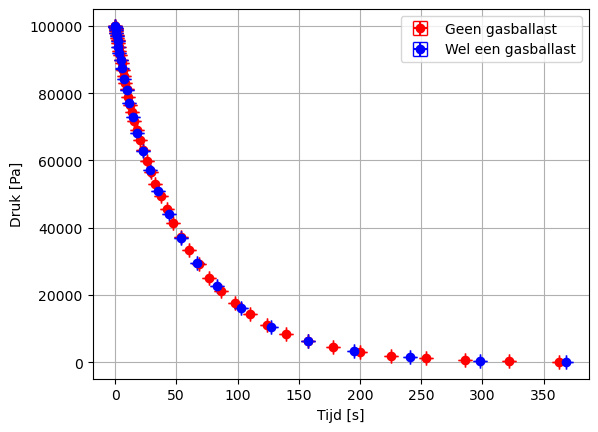

In [7]:
plt.errorbar(t1, p1, dp, dt, 'or', label='Geen gasballast', capsize=5)
plt.errorbar(t2, p2, dp, dt, 'ob', label='Wel een gasballast', capsize=5)
plt.legend()
plt.grid()
plt.xlabel('Tijd [s]')
plt.ylabel('Druk [Pa]')
plt.savefig('Proef7 metingen1.pdf', dpi=300, bbox_inches='tight')

Bereken $p-p_e$ en $\log_{10}(p-p_e)$ voor alle $p$ lijsten. Voor $p_1$ en $p_2$ is dit $3\times10^{-3}$ HPa en voor $p_3$ en $p_4$ is dit $100$ HPa.

In [8]:
p1 = p1-pe1
p2 = p2-pe1
p3 = p3-pe2
p4 = p4-pe2

p1 = np.log10(p1)
p2 = np.log10(p2)
p3 = np.log10(p3)
p4 = np.log10(p4)

Bereken de fit voor de data

In [9]:
fits = []
for t, p in zip([t1, t2, t3, t4], [p1, p2, p3, p4]):
    fits.append(linregress(t, p))

In [10]:
print(fits)

[LinregressResult(slope=-0.00788794654223609, intercept=4.997031486879315, rvalue=-0.9989480753465951, pvalue=6.402711876530212e-66, stderr=5.226289931501398e-05, intercept_stderr=0.005820859191121083), LinregressResult(slope=-0.007995254615896445, intercept=4.9998301170618245, rvalue=-0.9984488339797696, pvalue=1.1324834030515852e-36, stderr=8.425644420007757e-05, intercept_stderr=0.00962910726824636), LinregressResult(slope=-0.00743947499255981, intercept=4.930566038485461, rvalue=-0.9997242240392179, pvalue=3.5972219152133974e-47, stderr=3.302526521708273e-05, intercept_stderr=0.004114799673274553), LinregressResult(slope=-0.007359341245867707, intercept=4.930068360658595, rvalue=-0.9996717415500435, pvalue=4.121564009285152e-46, stderr=3.564427795929925e-05, intercept_stderr=0.00460663624221716)]


In [11]:
def func(x, a, b):
    return a*x+b

Geen gasballast, geen lek

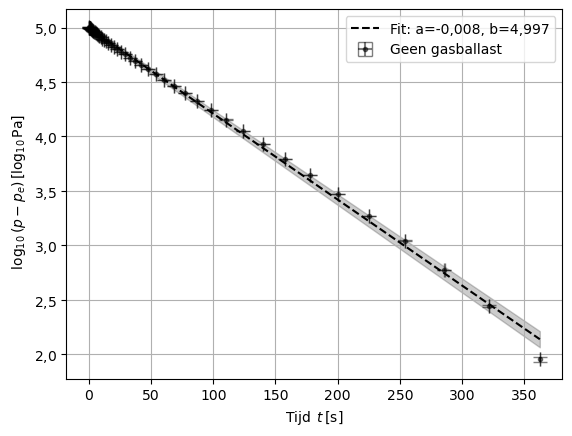

In [12]:
formatterY = TN.TNFormatter(2)

fig, ax = plt.subplots()  # 1 figuur
ax.yaxis.set_major_formatter(formatterY)

plt.errorbar(t1, p1, dp/(np.log(10)*np.power(10, p1)), dt, 'ok', markersize=3, alpha=0.5, label='Geen gasballast', capsize=5)
plt.plot(t1, func(t1, fits[0][0], fits[0][1]), 'k--', label=str('Fit: a=%5.3f, b=%5.3f' % (fits[0][0], fits[0][1])).replace('.', ','))
p1_max = func(t1, fits[0].slope + 3 * fits[0].stderr, fits[0].intercept + 3 * fits[0].intercept_stderr)
p1_min = func(t1, fits[0].slope - 3 * fits[0].stderr, fits[0].intercept - 3 * fits[0].intercept_stderr)
plt.fill_between(t1, p1_min, p1_max, color='k', alpha=0.2)
plt.legend()
TN.label_x('t', 's', ax, text='Tijd')
TN.label_y(r'\log_{10}(p-p_e)', r'\log_{10}Pa', ax)
plt.grid()
plt.savefig('GeenGeen.pdf', dpi=300, bbox_inches='tight')


Wel gasballast, geen lek

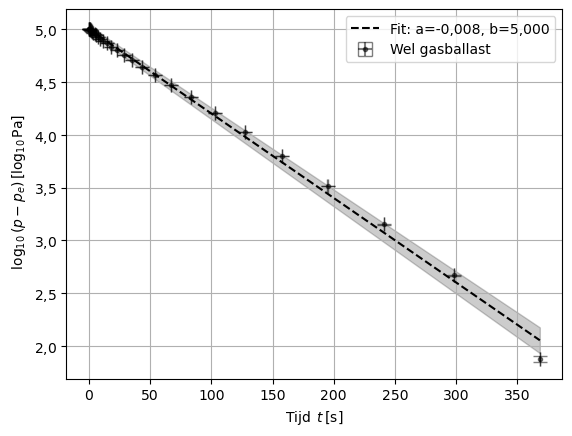

In [13]:
formatterY = TN.TNFormatter(2)

fig, ax = plt.subplots()  # 1 figuur
ax.yaxis.set_major_formatter(formatterY)

plt.errorbar(t2, p2, dp/(np.log(10)*np.power(10, p2)), dt, 'ok', markersize=3, alpha=0.5, label='Wel gasballast', capsize=5)
plt.plot(t2, func(t2, fits[2-1][0], fits[2-1][1]), 'k--', label=str('Fit: a=%5.3f, b=%5.3f' % (fits[2-1][0], fits[2-1][1])).replace('.', ','))
p2_max = func(t2, fits[2-1].slope + 3 * fits[2-1].stderr, fits[2-1].intercept + 3 * fits[2-1].intercept_stderr)
p2_min = func(t2, fits[2-1].slope - 3 * fits[2-1].stderr, fits[2-1].intercept - 3 * fits[2-1].intercept_stderr)
plt.fill_between(t2, p2_min, p2_max, color='k', alpha=0.2)
plt.legend()
TN.label_x('t', 's', ax, text='Tijd')
TN.label_y(r'\log_{10}(p-p_e)', r'\log_{10}Pa', ax)
plt.grid()
plt.savefig('WelGeen.pdf', dpi=300, bbox_inches='tight')

Geen gasballast, wel lek

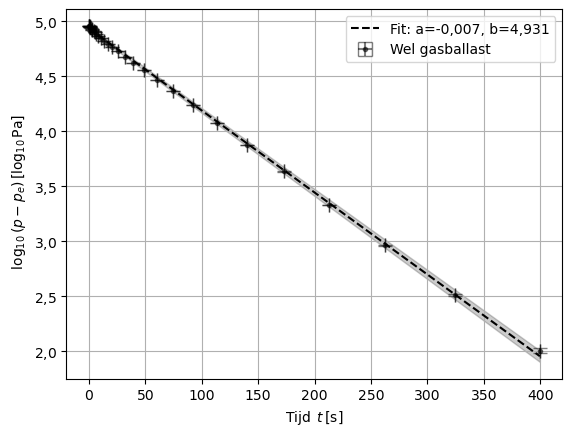

In [14]:
formatterY = TN.TNFormatter(2)

fig, ax = plt.subplots()  # 1 figuur
ax.yaxis.set_major_formatter(formatterY)

plt.errorbar(t3, p3, dp/(np.log(10)*np.power(10, p3)), dt, 'ok', markersize=3, alpha=0.5, label='Wel gasballast', capsize=5)
plt.plot(t3, func(t3, fits[3-1][0], fits[3-1][1]), 'k--', label=str('Fit: a=%5.3f, b=%5.3f' % (fits[3-1][0], fits[3-1][1])).replace('.', ','))
p3_max = func(t3, fits[3-1].slope + 3 * fits[3-1].stderr, fits[3-1].intercept + 3 * fits[3-1].intercept_stderr)
p3_min = func(t3, fits[3-1].slope - 3 * fits[3-1].stderr, fits[3-1].intercept - 3 * fits[3-1].intercept_stderr)
plt.fill_between(t3, p3_min, p3_max, color='k', alpha=0.2)
plt.legend()
TN.label_x('t', 's', ax, text='Tijd')
TN.label_y(r'\log_{10}(p-p_e)', r'\log_{10}Pa', ax)
plt.grid()
plt.savefig('GeenWel.pdf', dpi=300, bbox_inches='tight')

Wel gasballast, wel lek

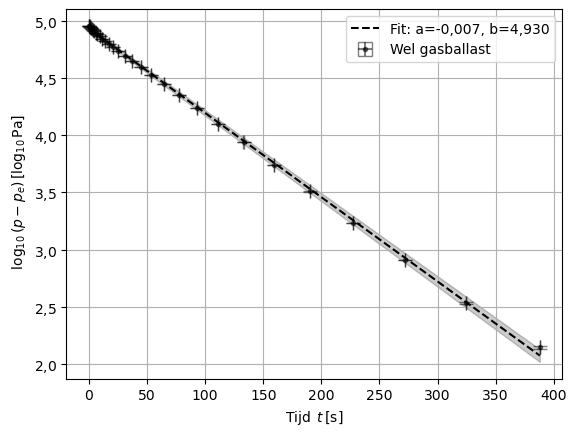

In [15]:
formatterY = TN.TNFormatter(2)

fig, ax = plt.subplots()  # 1 figuur
ax.yaxis.set_major_formatter(formatterY)

plt.errorbar(t4, p4, dp/(np.log(10)*np.power(10, p4)), dt, 'ok', markersize=3, alpha=0.5, label='Wel gasballast', capsize=5)
plt.plot(t4, func(t4, fits[4-1][0], fits[4-1][1]), 'k--', label=str('Fit: a=%5.3f, b=%5.3f' % (fits[4-1][0], fits[4-1][1])).replace('.', ','))
p4_max = func(t4, fits[4-1].slope + 3 * fits[4-1].stderr, fits[4-1].intercept + 3 * fits[4-1].intercept_stderr)
p4_min = func(t4, fits[4-1].slope - 3 * fits[4-1].stderr, fits[4-1].intercept - 3 * fits[4-1].intercept_stderr)
plt.fill_between(t4, p4_min, p4_max, color='k', alpha=0.2)
plt.legend()
TN.label_x('t', 's', ax, text='Tijd')
TN.label_y(r'\log_{10}(p-p_e)', r'\log_{10}Pa', ax)
plt.grid()
plt.savefig('WelWel.pdf', dpi=300, bbox_inches='tight')

In [16]:
def find_S(slope, slope_err):
    S = -2.3*slope*V_kamer
    S_err = np.sqrt((2.3*V_kamer*slope_err)**2+(2.3*slope*dV_kamer)**2)
    return S, S_err

In [17]:
S1 = find_S(fits[1-1].slope, fits[1-1].stderr)
S2 = find_S(fits[2-1].slope, fits[2-1].stderr)
S3 = find_S(fits[3-1].slope, fits[3-1].stderr)
S4 = find_S(fits[4-1].slope, fits[4-1].stderr)

In [18]:
print(r"{:.1e}±{:.1e}".format(S1[0], S1[1]), r"{:.1e}±{:.1e}".format(S2[0], S2[1]), r"{:.1e}±{:.1e}".format(S3[0], S3[1]), r"{:.1e}±{:.1e}".format(S4[0], S4[1]))

7.8e-04±1.4e-05 7.9e-04±1.5e-05 7.4e-04±1.2e-05 7.3e-04±1.2e-05


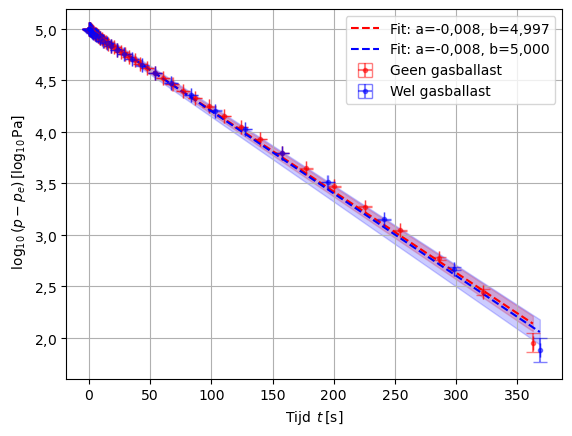

In [30]:
formatterY = TN.TNFormatter(2)

fig, ax = plt.subplots()  # 1 figuur
ax.yaxis.set_major_formatter(formatterY)

plt.errorbar(t1, p1, dp/(np.log(10)*np.power(10, p1)), dt, 'or', markersize=3, alpha=0.5, label='Geen gasballast', capsize=5)
plt.plot(t1, func(t1, fits[0][0], fits[0][1]), 'r--', label=str('Fit: a=%5.3f, b=%5.3f' % (fits[0][0], fits[0][1])).replace('.', ','))
p1_max = func(t1, fits[0].slope + 3 * fits[0].stderr, fits[0].intercept + 3 * fits[0].intercept_stderr)
p1_min = func(t1, fits[0].slope - 3 * fits[0].stderr, fits[0].intercept - 3 * fits[0].intercept_stderr)
plt.fill_between(t1, p1_min, p1_max, color='r', alpha=0.2)
plt.errorbar(t2, p2, dp/(np.log(10)*np.power(10, p2)), dt, 'ob', markersize=3, alpha=0.5, label='Wel gasballast', capsize=5)
plt.plot(t2, func(t2, fits[2-1][0], fits[2-1][1]), 'b--', label=str('Fit: a=%5.3f, b=%5.3f' % (fits[2-1][0], fits[2-1][1])).replace('.', ','))
p2_max = func(t2, fits[2-1].slope + 3 * fits[2-1].stderr, fits[2-1].intercept + 3 * fits[2-1].intercept_stderr)
p2_min = func(t2, fits[2-1].slope - 3 * fits[2-1].stderr, fits[2-1].intercept - 3 * fits[2-1].intercept_stderr)
plt.fill_between(t2, p2_min, p2_max, color='b', alpha=0.2)
plt.legend()
TN.label_x('t', 's', ax, text='Tijd')
TN.label_y(r'\log_{10}(p-p_e)', r'\log_{10}Pa', ax)
plt.grid()
plt.savefig('InvloedGasballast.pdf', dpi=300, bbox_inches='tight')

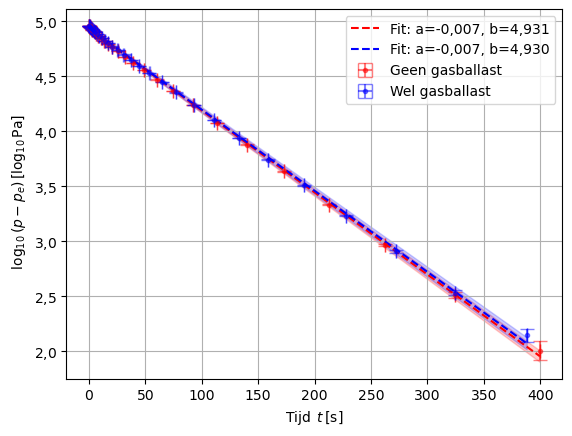

In [31]:
formatterY = TN.TNFormatter(2)

fig, ax = plt.subplots()  # 1 figuur
ax.yaxis.set_major_formatter(formatterY)

plt.errorbar(t3, p3, dp/(np.log(10)*np.power(10, p3)), dt, 'or', markersize=3, alpha=0.5, label='Geen gasballast', capsize=5)
plt.plot(t3, func(t3, fits[3-1][0], fits[3-1][1]), 'r--', label=str('Fit: a=%5.3f, b=%5.3f' % (fits[3-1][0], fits[3-1][1])).replace('.', ','))
p3_max = func(t3, fits[3-1].slope + 3 * fits[3-1].stderr, fits[3-1].intercept + 3 * fits[3-1].intercept_stderr)
p3_min = func(t3, fits[3-1].slope - 3 * fits[3-1].stderr, fits[3-1].intercept - 3 * fits[3-1].intercept_stderr)
plt.fill_between(t3, p3_min, p3_max, color='r', alpha=0.2)
plt.errorbar(t4, p4, dp/(np.log(10)*np.power(10, p4)), dt, 'ob', markersize=3, alpha=0.5, label='Wel gasballast', capsize=5)
plt.plot(t4, func(t4, fits[4-1][0], fits[4-1][1]), 'b--', label=str('Fit: a=%5.3f, b=%5.3f' % (fits[4-1][0], fits[4-1][1])).replace('.', ','))
p4_max = func(t4, fits[4-1].slope + 3 * fits[4-1].stderr, fits[4-1].intercept + 3 * fits[4-1].intercept_stderr)
p4_min = func(t4, fits[4-1].slope - 3 * fits[4-1].stderr, fits[4-1].intercept - 3 * fits[4-1].intercept_stderr)
plt.fill_between(t4, p4_min, p4_max, color='b', alpha=0.2)
plt.legend()
TN.label_x('t', 's', ax, text='Tijd')
TN.label_y(r'\log_{10}(p-p_e)', r'\log_{10}Pa', ax)
plt.grid()
plt.savefig('InvloedLek.pdf', dpi=300, bbox_inches='tight')

# Constant druk methode
Laad de data in

In [32]:
dataset = pd.read_excel('Proef7 metingen.xlsx')
select_dataset = dataset.iloc[[0, 1, 2, 3, 4, 5], [2, 3, 4, 5]]
print(select_dataset)

       t2      t3      t4      t5
0   5.199   5.232   5.099   5.232
1   6.030   5.970   5.900     NaN
2   8.170   8.250   7.770   7.840
3   9.700   9.510   9.480     NaN
4  16.550  16.350  16.470  16.070
5  25.860  25.350  25.420  26.180


In [33]:
numpy_arrays = select_dataset.values
    
t30 = numpy_arrays[0][~np.isnan(numpy_arrays[0])]
t25 = numpy_arrays[1][~np.isnan(numpy_arrays[1])]
t20 = numpy_arrays[2][~np.isnan(numpy_arrays[2])]
t15 = numpy_arrays[3][~np.isnan(numpy_arrays[3])]
t10 = numpy_arrays[4][~np.isnan(numpy_arrays[4])]
t5 = numpy_arrays[5][~np.isnan(numpy_arrays[5])]
t_list = [t30, t25, t20, t15, t10, t5]

Constante waarden toevoegen zoals onnauwkeurigheden, etc.

In [34]:
dp = 0.2*100 #HPa->Pa
p_a = 1000*100 #HPa->Pa
d_buis = 20.7e-3
L_buis = 0.41
dL_buis = 0.01
V_buis = np.pi*(d_buis/2)**2*L_buis
dV_buis = np.pi/4*d_buis**2*dL_buis

Bereken de gemiddelde tijd en de standaardafwijking

In [35]:
tas = []
for t in t_list:
    tas.append((np.mean(t), 3*np.std(t)))

tas = np.array(tas)

In [36]:
p = np.array([30, 25, 20, 15, 10, 5])*100

In [37]:
def find_S_2(t, t_err, p):
    S = p_a * V_buis / (t * p)
    S_err = np.sqrt((p_a * V_buis * t_err / (t**2 * p))**2 + (p_a * V_buis * dp / (t * p**2))**2 + (p_a * dV_buis / (t * p))**2)
    return S, S_err

In [38]:
S_list = []
for i in range(len(tas)):
    S_list.append((find_S_2(tas[i][0], tas[i][1], p[i])[0], find_S_2(tas[i][0], tas[i][1], p[i])[1]))
S_list = np.array(S_list)

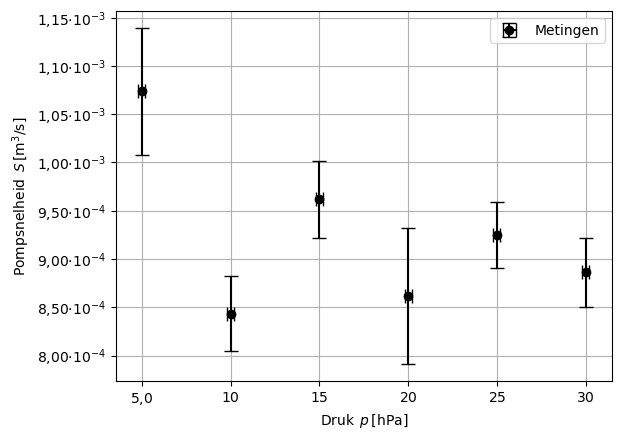

In [41]:
formatterY = TN.TNFormatter(3)
formatterX = TN.TNFormatter(2)

fig, ax = plt.subplots()  # 1 figuur
ax.yaxis.set_major_formatter(formatterY)
ax.xaxis.set_major_formatter(formatterX)

plt.errorbar(p/100, S_list[:, 0], S_list[:, 1], dp/100, 'ok', capsize=5, label='Metingen')
TN.label_x('p', 'hPa', ax, text='Druk')
TN.label_y(r'S', r'm^3/s', ax, text='Pompsnelheid')
plt.legend()
plt.grid()
plt.savefig('Constantedruk.pdf', dpi=300, bbox_inches='tight')

In [42]:
print(r"{:.2e}±{:.2e}".format(S_list[0][0], S_list[0][1]), r"{:.2e}±{:.2e}".format(S_list[1][0], S_list[1][1]), r"{:.2e}±{:.2e}".format(S_list[2][0], S_list[2][1]), r"{:.2e}±{:.2e}".format(S_list[3][0], S_list[3][1]), r"{:.2e}±{:.2e}".format(S_list[4][0], S_list[4][1]), r"{:.2e}±{:.2e}".format(S_list[5][0], S_list[5][1]))

8.86e-04±3.58e-05 9.25e-04±3.43e-05 8.62e-04±7.03e-05 9.62e-04±3.97e-05 8.43e-04±3.87e-05 1.07e-03±6.58e-05
